# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_il_other, get_and_process_covidtracking_data_il_contact, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_other = get_and_process_covidtracking_data_il_other(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_contact = get_and_process_covidtracking_data_il_contact(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))


In [3]:
region = "Israel"
model_data = df.loc[region]
model_data_other = df_other.loc[region]
model_data_contact = df_contact.loc[region]

## Create the model instance and sample

In [4]:
gm = GenerativeModel(region, model_data)
gm.sample()
gm_other = GenerativeModel(region, model_data_other)
gm_other.sample()
gm_contact = GenerativeModel(region, model_data_contact)
gm_contact.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2420 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2336 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2444 seconds.


## Summarize Model Output

In [5]:
result = summarize_inference_data(gm.inference_data)
result_other = summarize_inference_data(gm_other.inference_data)
result_contact = summarize_inference_data(gm_contact.inference_data)

In [6]:
result.tail(21)

result_contact.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-07-10,1.024992,1.025762,0.917134,1.118473,302.695412,331.819734,310.965540,485.0,563
2020-07-11,1.026362,1.027875,0.903974,1.121879,304.095358,333.457466,315.705514,265.0,303
2020-07-12,1.025705,1.023853,0.906603,1.130897,305.531476,335.039808,329.492829,607.0,665
2020-07-13,1.027467,1.023231,0.906992,1.140978,307.060954,336.578850,332.644036,634.0,688
2020-07-14,1.027632,1.025169,0.891211,1.141785,308.671452,338.088725,334.757708,715.0,771
2020-07-15,1.029625,1.021461,0.882374,1.156537,310.380642,339.586965,328.202413,711.0,782
2020-07-16,1.030912,1.025891,0.875280,1.153226,312.219413,341.088988,337.305903,855.0,915
2020-07-17,1.031080,1.023471,0.873277,1.170631,314.234660,342.603783,339.815802,546.0,580
2020-07-18,1.031986,1.028130,0.863291,1.170028,316.462827,344.137231,336.475826,206.0,221


## Plot Model Output

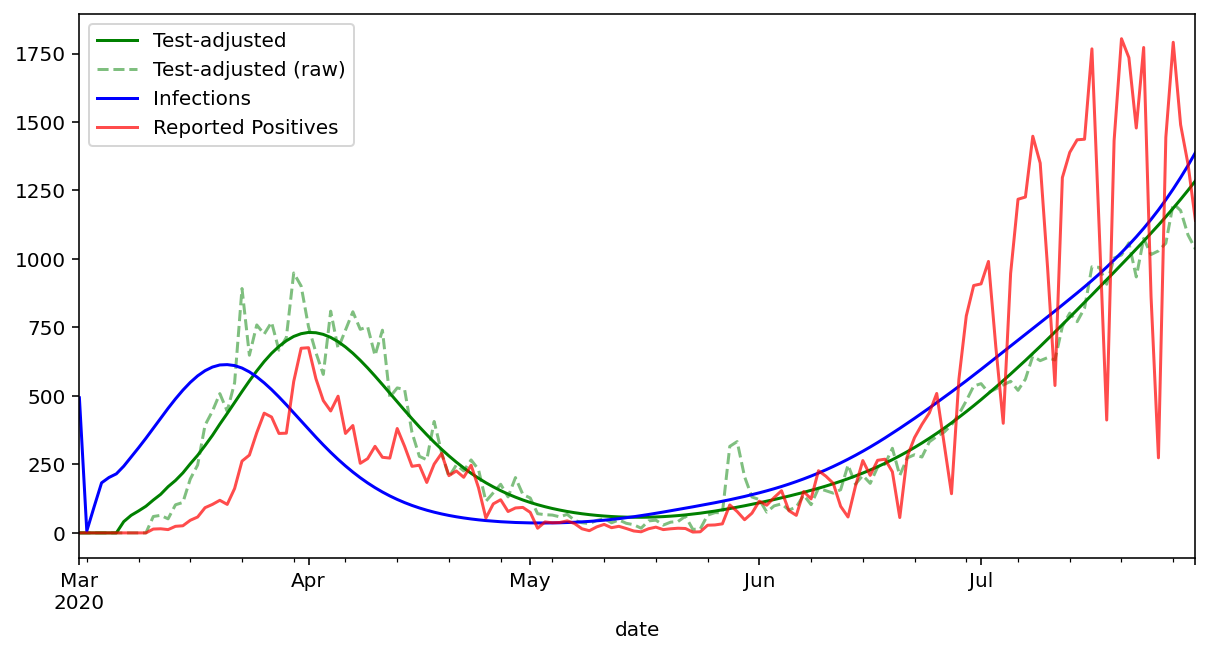

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

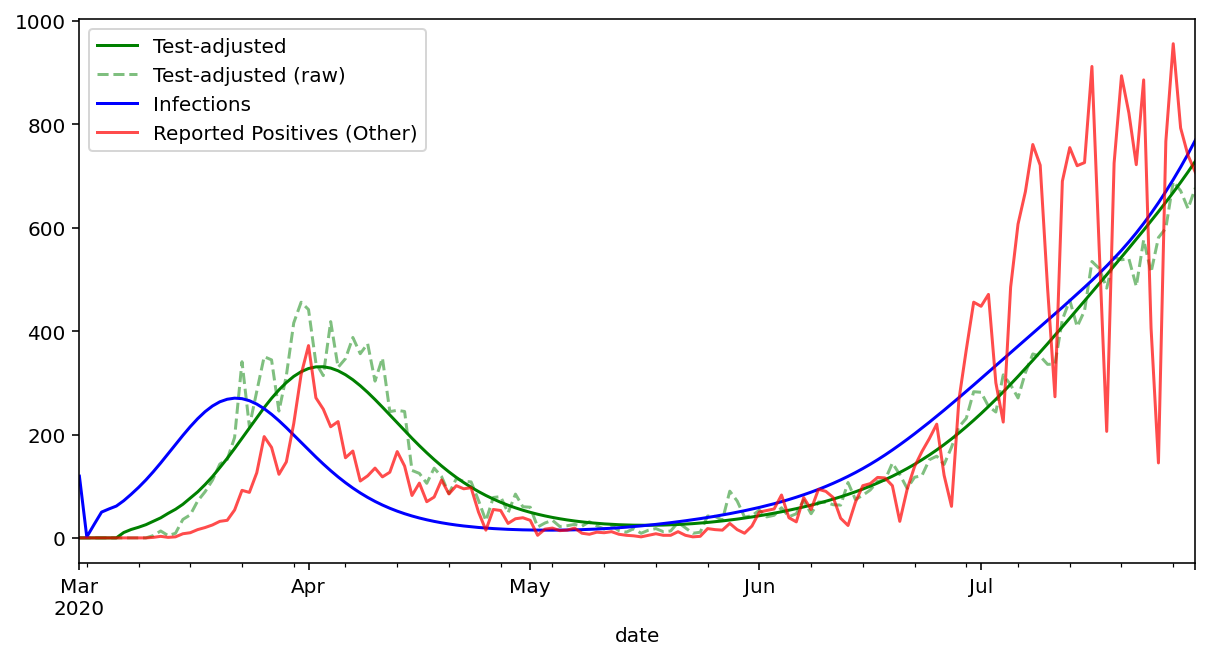

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
result_other.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_other.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_other.infections.plot(c="b", label="Infections")
gm_other.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (Other)")
fig.set_facecolor('w')
ax.legend();

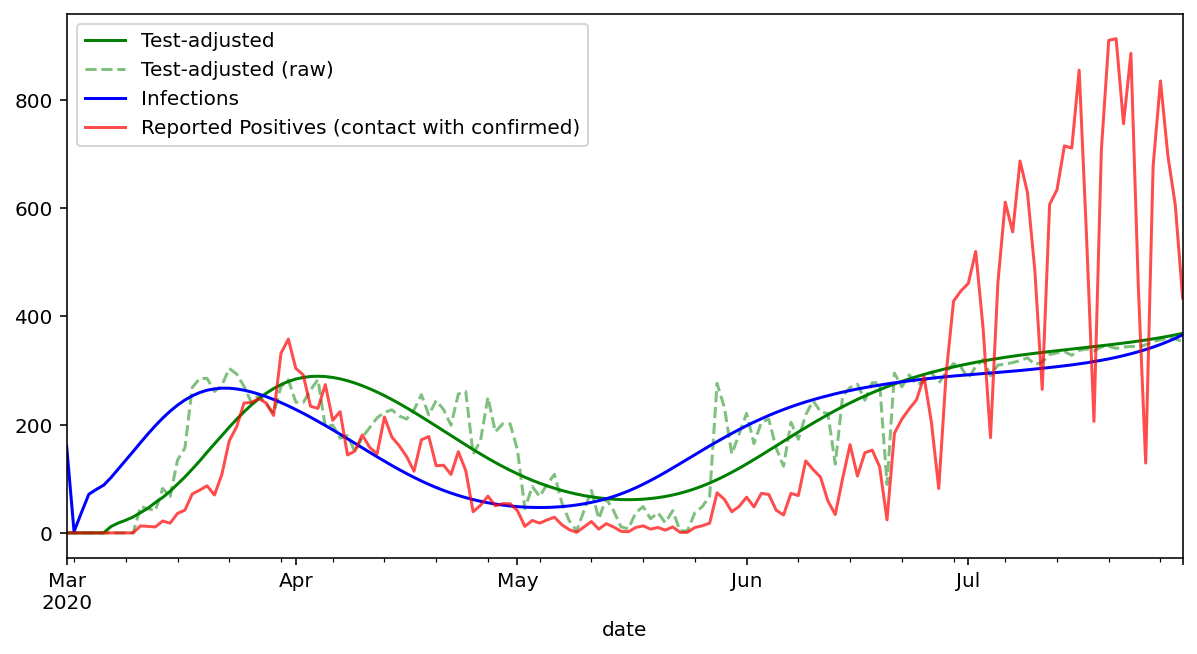

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
result_contact.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_contact.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_contact.infections.plot(c="b", label="Infections")
gm_contact.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (contact with confirmed)")
fig.set_facecolor('w')
ax.legend();

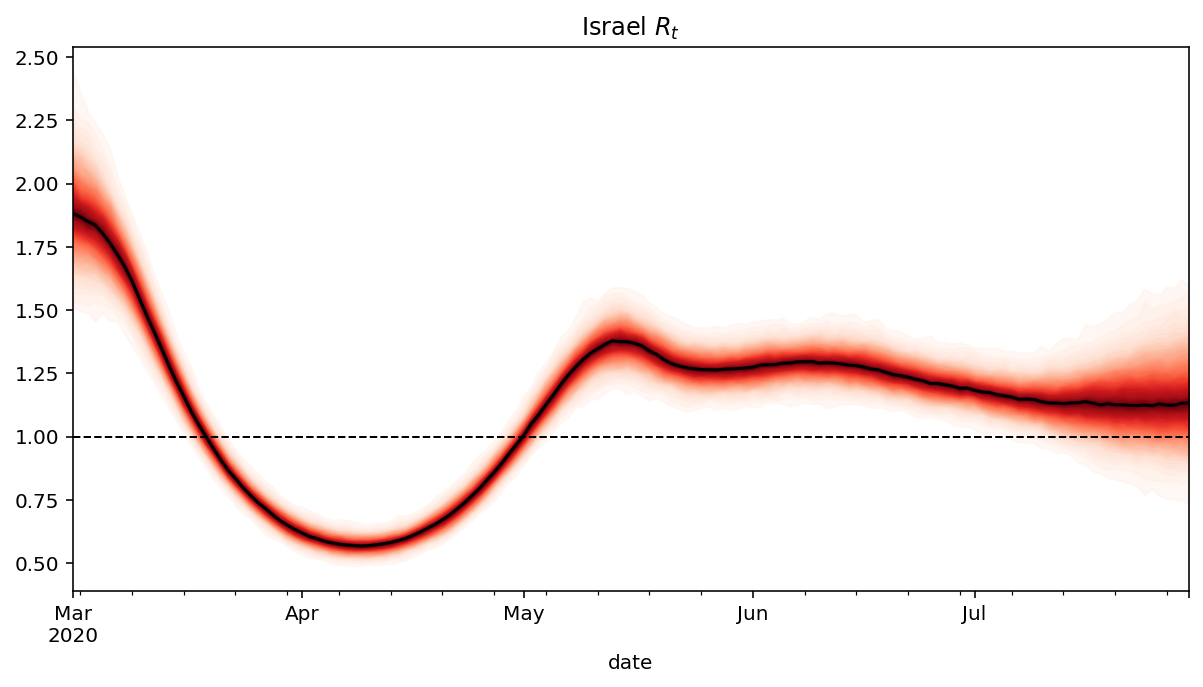

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

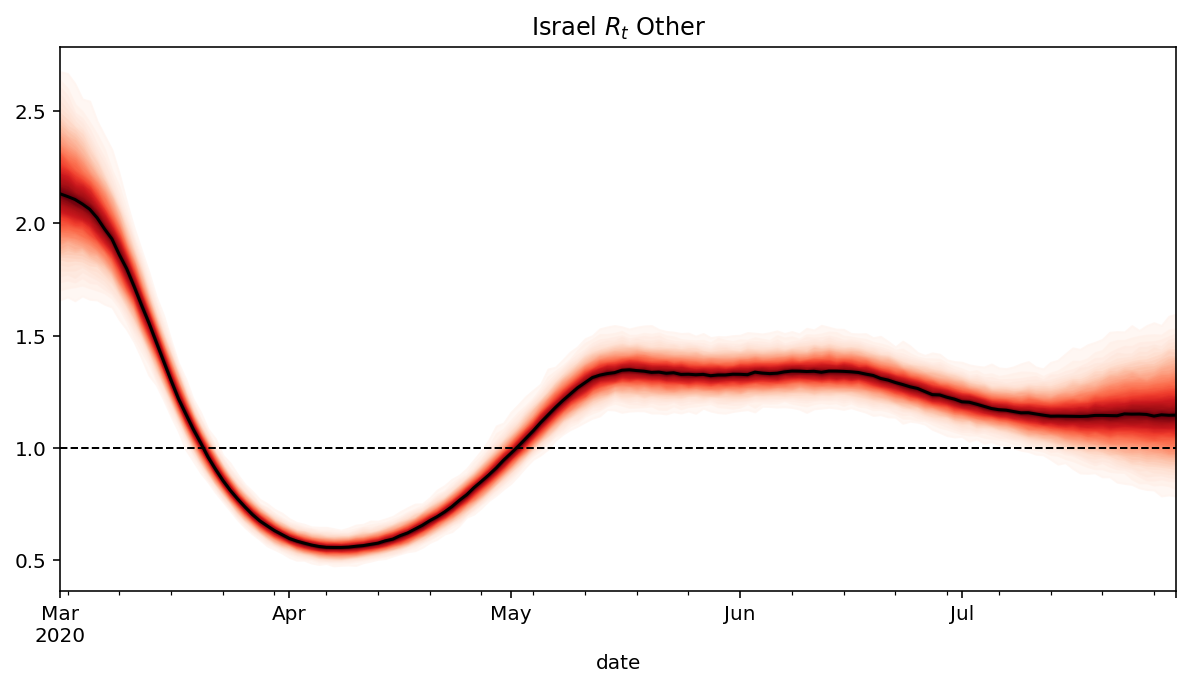

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ Other")
samples = gm_other.trace['r_t']
x=result_other.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_other["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

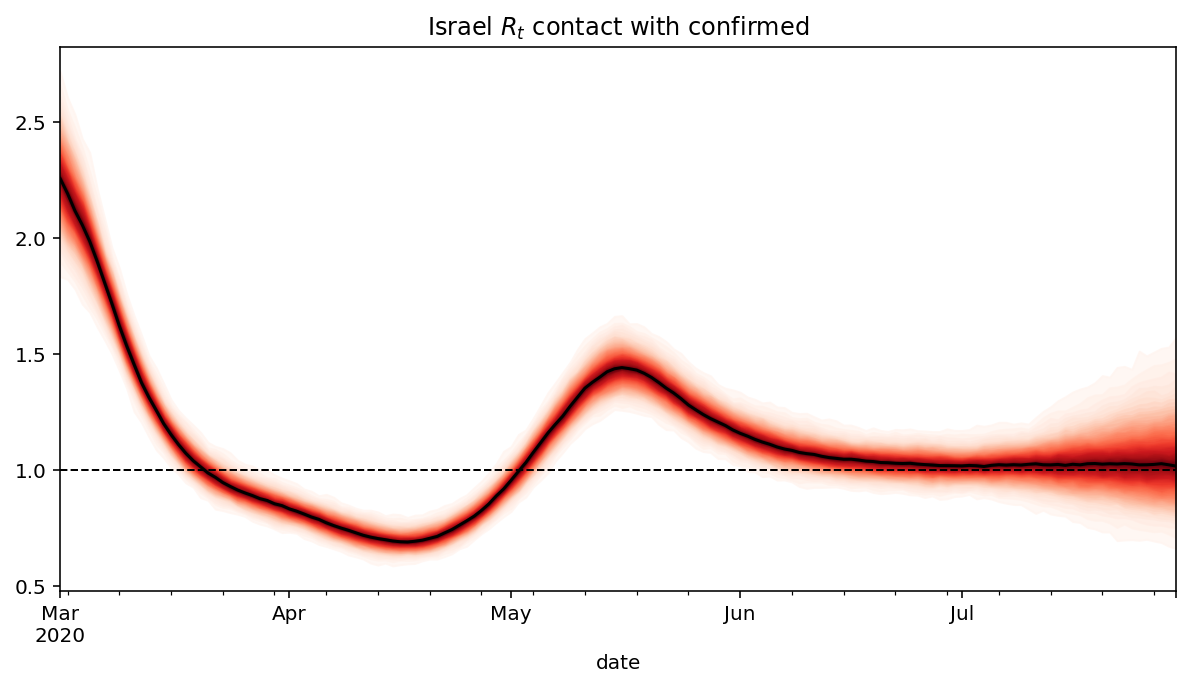

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ contact with confirmed")
samples = gm_contact.trace['r_t']
x=result_contact.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_contact["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

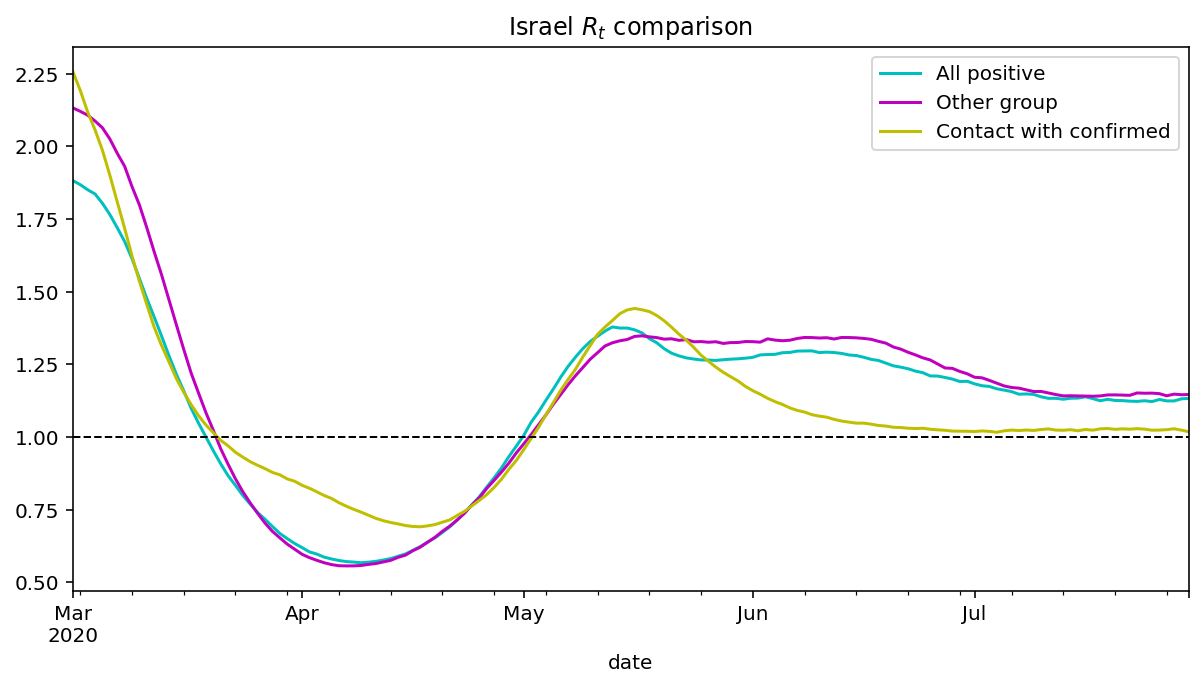

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ comparison")
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))

result["median"].plot(c="c", ls='-', label="All positive")
result_other["median"].plot(c="m", ls='-', label="Other group")
result_contact["median"].plot(c="y", ls='-', label="Contact with confirmed")

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')
ax.legend()

In [14]:
result_other.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-07-10,1.157780,1.156805,1.046052,1.259344,420.644562,375.629510,335.710925,483.0,14214
2020-07-11,1.153203,1.151491,1.046367,1.259883,433.237569,391.955884,336.255027,273.0,8021
2020-07-12,1.148837,1.146073,1.033192,1.251037,445.973520,408.428530,422.252858,690.0,16144
2020-07-13,1.145530,1.141488,1.025882,1.252387,458.849713,425.013642,459.865424,755.0,16220
2020-07-14,1.145237,1.141912,0.999193,1.242501,471.787555,441.681633,408.618734,720.0,17408
2020-07-15,1.144952,1.141327,0.989335,1.251836,484.812636,458.422321,439.438297,726.0,16322
2020-07-16,1.145525,1.141076,0.983412,1.256309,498.116223,475.233433,534.692159,912.0,16851
2020-07-17,1.144955,1.140295,0.998439,1.286089,511.862921,492.111064,520.963173,554.0,10506
2020-07-18,1.144970,1.141272,0.975825,1.285859,526.137316,509.060890,483.185078,206.0,4212
